In [3]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns



The dataset we will use is the Netflix prize dataset, which contains more than a million ratings for different movies over the years. 


The traning set of the netflix database consists of 1) 4 txt files with the following structure: a row with the film id, and under it a series of rows containing the customer id, film rating and date; 2) a csv containing the movie id, year of release and title 

For this project, we built a subset of this database (500.000 lines) and we will add the information for film title and genre.

Step 1: 
Load data, restructure data to create the following columns: film id, customer id, rating, date; and create radom sample of 500.000 lines 


In [4]:
df_ratings = pd.read_csv("netflix_sampled_500k_proportional.csv")


df_ratings

,movie_id,customer_id,rating,date
0,14086,2310762,5,2005-07-07
1,16390,1882111,4,2004-03-04
2,16565,998169,2,2005-10-21
3,15107,2427506,4,2003-07-05
4,15755,618829,4,2005-06-14
...,...,...,...,...
499995,2128,462,5,2005-05-09
499996,1974,90928,5,2005-11-01
499997,478,1197493,1,2004-07-09
499998,2375,2328701,5,2004-06-03


Step 2. Load and join the movie titles file


In [5]:
#Read and clean the movie titles file 
titles_rows = []
    
with open('movie_titles.csv', 'r', encoding = 'latin-1') as f: 
    for line in f: 
      line = line.strip()
      parts = line.split(',', 2)

      if len(parts) == 3:
            film_id, year, title = parts
            titles_rows.append([int(film_id), year, title])

df_titles = pd.DataFrame(titles_rows, columns=['movie_id', 'year', 'title'])


In [6]:
df_titles



,movie_id,year,title
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [7]:
#merge the movie titles file with the rating file

df_ratings_titles   = pd.merge(df_ratings, df_titles, how = 'left', on = 'movie_id')



df_ratings_titles

,movie_id,customer_id,rating,date,year,title
0,14086,2310762,5,2005-07-07,1999,Dawson's Creek: Season 3
1,16390,1882111,4,2004-03-04,2002,Panic Room
2,16565,998169,2,2005-10-21,2001,K-Pax
3,15107,2427506,4,2003-07-05,2001,Ocean's Eleven
4,15755,618829,4,2005-06-14,1988,Big
...,...,...,...,...,...,...
499995,2128,462,5,2005-05-09,1993,Rudy
499996,1974,90928,5,2005-11-01,1995,Il Postino
499997,478,1197493,1,2004-07-09,1962,The Beverly Hillbillies
499998,2375,2328701,5,2004-06-03,1989,Fletch Lives


Step 3. Load and join the genres file

In [8]:
#read the genre file
df_genres = pd.read_csv('netflix_genres.csv')

df_genres

,movieId,genres
0,1,Documentary|Animation|Family
1,3,Crime|Drama|Mystery
2,4,Family
3,5,Documentary|Sport
4,6,Documentary
...,...,...
12274,17764,Comedy|Drama|History|Romance
12275,17765,Action|Adventure|Family|Sci-Fi
12276,17768,Action|Drama|Fantasy
12277,17769,Drama|Music|Romance


In [9]:
#merge the df with the genre file 

df = pd.merge(df_ratings_titles, df_genres, how = 'left', left_on = 'movie_id', right_on = 'movieId').drop('movieId', axis = 1)

df

,movie_id,customer_id,rating,date,year,title,genres
0,14086,2310762,5,2005-07-07,1999,Dawson's Creek: Season 3,NaN
1,16390,1882111,4,2004-03-04,2002,Panic Room,Crime|Drama|Thriller
2,16565,998169,2,2005-10-21,2001,K-Pax,Drama|Sci-Fi
3,15107,2427506,4,2003-07-05,2001,Ocean's Eleven,Crime|Thriller
4,15755,618829,4,2005-06-14,1988,Big,Comedy|Drama|Fantasy|Romance
...,...,...,...,...,...,...,...
499995,2128,462,5,2005-05-09,1993,Rudy,Biography|Drama|Sport
499996,1974,90928,5,2005-11-01,1995,Il Postino,Talk-Show
499997,478,1197493,1,2004-07-09,1962,The Beverly Hillbillies,Comedy|Family
499998,2375,2328701,5,2004-06-03,1989,Fletch Lives,Comedy|Crime|Mystery


Step 4. Data exploration, missing data treatment and variable creation 


In [10]:
### Première choses dans l'analyse exploratoire: Connaître le Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   movie_id     500000 non-null  int64 
 1   customer_id  500000 non-null  int64 
 2   rating       500000 non-null  int64 
 3   date         500000 non-null  object
 4   year         500000 non-null  object
 5   title        500000 non-null  object
 6   genres       449270 non-null  object
dtypes: int64(3), object(4)
memory usage: 26.7+ MB


In [11]:
### change type for the year and date variables which are strings 

df["date"] = pd.to_datetime(df["date"])
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.info() ### On voit bien que maintenant tout est dans le bon format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   movie_id     500000 non-null  int64         
 1   customer_id  500000 non-null  int64         
 2   rating       500000 non-null  int64         
 3   date         500000 non-null  datetime64[ns]
 4   year         499997 non-null  float64       
 5   title        500000 non-null  object        
 6   genres       449270 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 26.7+ MB


In [12]:
#check for missing data 
df.isnull().sum()

movie_id           0
customer_id        0
rating             0
date               0
year               3
title              0
genres         50730
dtype: int64

In [13]:
#we have missing data for the year so let's see what they are 
df.loc[(df['year'].isna())]



,movie_id,customer_id,rating,date,year,title,genres
105506,15918,2620163,3,2002-11-07,NaN,Hote Hote Pyaar Ho Gaya,NaN
122086,17667,855878,5,2004-04-19,NaN,Eros Dance Dhamaka,NaN
359870,7241,2248421,3,2005-08-24,NaN,Ancient Civilizations: Athens and Greece,NaN


In [14]:
#let's drop them for now (@Paulo being only three titles we could fill them with the real values, opinions? )
df = df.dropna(subset={"year"})


In [15]:
#check the na again 

df.isnull().sum()

#year is good now 

movie_id           0
customer_id        0
rating             0
date               0
year               0
title              0
genres         50727
dtype: int64

In [16]:
#we have missing data in the genre column so let's visualize them 
df.loc[(df['genres'].isna())]




,movie_id,customer_id,rating,date,year,title,genres
0,14086,2310762,5,2005-07-07,1999.0,Dawson's Creek: Season 3,NaN
8,17633,416556,4,2004-06-21,1998.0,Joseph and the Amazing Technicolor Dreamcoat,NaN
9,15306,1792741,3,2005-07-19,2003.0,Sealab 2021: Season 3,NaN
34,14621,882359,4,2003-10-11,2001.0,Shrek (Full-screen),NaN
53,14302,1360238,5,2004-10-19,2000.0,The Sopranos: Season 2,NaN
...,...,...,...,...,...,...,...
499954,4243,200362,3,2005-07-10,1995.0,The Desperate Trail,NaN
499966,111,911778,2,2004-06-14,2003.0,Duplex (Widescreen),NaN
499979,1476,429060,3,2005-11-07,2004.0,Six Feet Under: Season 4,NaN
499991,3253,269152,3,2004-09-15,1998.0,The Opposite of Sex,NaN


In [17]:
# fill the NaN with 'Empty' (@Paulo: for now, tell me if you have other ideas for missing values)

df['genres'].fillna('Empty', inplace=True)

/tmp/ipykernel_186286/3670275683.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('Empty', inplace=True)
/tmp/ipykernel_186286/3670275683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'].fillna('Empty', inplace=True)


In [18]:
df


,movie_id,customer_id,rating,date,year,title,genres
0,14086,2310762,5,2005-07-07,1999.0,Dawson's Creek: Season 3,Empty
1,16390,1882111,4,2004-03-04,2002.0,Panic Room,Crime|Drama|Thriller
2,16565,998169,2,2005-10-21,2001.0,K-Pax,Drama|Sci-Fi
3,15107,2427506,4,2003-07-05,2001.0,Ocean's Eleven,Crime|Thriller
4,15755,618829,4,2005-06-14,1988.0,Big,Comedy|Drama|Fantasy|Romance
...,...,...,...,...,...,...,...
499995,2128,462,5,2005-05-09,1993.0,Rudy,Biography|Drama|Sport
499996,1974,90928,5,2005-11-01,1995.0,Il Postino,Talk-Show
499997,478,1197493,1,2004-07-09,1962.0,The Beverly Hillbillies,Comedy|Family
499998,2375,2328701,5,2004-06-03,1989.0,Fletch Lives,Comedy|Crime|Mystery


In [19]:
# i want to see how many of these are tv series and not movies, documentaries etc
 

#filter the titles that contain 'season '. This is the most common structure of the title when it is a series but some others could be left out, let's just have a look
series = df['title'].str.contains('Season ')



print(series.sum())


df[series]




15075


,movie_id,customer_id,rating,date,year,title,genres
0,14086,2310762,5,2005-07-07,1999.0,Dawson's Creek: Season 3,Empty
9,15306,1792741,3,2005-07-19,2003.0,Sealab 2021: Season 3,Empty
53,14302,1360238,5,2004-10-19,2000.0,The Sopranos: Season 2,Empty
66,13663,1948046,5,2005-11-16,2000.0,South Park: Season 4,Empty
69,16436,863285,2,2005-09-13,1966.0,The Monkees: Season 1,Empty
...,...,...,...,...,...,...,...
499885,4407,1197493,3,2004-10-04,1993.0,Boy Meets World: Season 1,Empty
499886,223,1070779,5,2005-08-03,2003.0,Chappelle's Show: Season 1,Empty
499906,2172,60269,4,2003-10-01,1991.0,The Simpsons: Season 3,Empty
499979,1476,429060,3,2005-11-07,2004.0,Six Feet Under: Season 4,Empty


In [20]:
#let's start with the new variables 

#the first column we add the decade
# it is a conditional column: if 1980<=year=>1989 -> 1980s 


#let's check the min and max 
df.describe()

,movie_id,customer_id,rating,date,year
count,499997.000000,4.999970e+05,499997.000000,499997,499997.000000
mean,9073.414536,1.321777e+06,3.606346,2004-10-09 07:03:02.917097728,1993.894949
min,1.000000,6.000000e+00,1.000000,1999-12-11 00:00:00,1896.000000
25%,4683.000000,6.592810e+05,3.000000,2004-04-30 00:00:00,1990.000000
50%,9051.000000,1.318721e+06,4.000000,2005-01-23 00:00:00,1998.000000
75%,13630.000000,1.984480e+06,4.000000,2005-07-09 00:00:00,2002.000000
max,17770.000000,2.649429e+06,5.000000,2005-12-31 00:00:00,2005.000000
std,5131.316496,7.657754e+05,1.084794,NaN,12.400878


In [21]:
###on voit que year min = 1896 et max= 2005 donc
conditions = [
    (df["year"] >= 1890) & (df["year"] <= 1899),
    (df["year"] >= 1900) & (df["year"] <= 1909),
    (df["year"] >= 1910) & (df["year"] <= 1919),
    (df["year"] >= 1920) & (df["year"] <= 1929),
    (df["year"] >= 1930) & (df["year"] <= 1939),
    (df["year"] >= 1940) & (df["year"] <= 1949),
    (df["year"] >= 1950) & (df["year"] <= 1959),
    (df["year"] >= 1960) & (df["year"] <= 1969),
    (df["year"] >= 1970) & (df["year"] <= 1979),
    (df["year"] >= 1980) & (df["year"] <= 1989),
    (df["year"] >= 1990) & (df["year"] <= 1999),
    (df["year"] >= 2000) & (df["year"] <= 2005)
]

values = [
    "1890s",
    "1900s",
    "1910s",
    "1920s",
    "1930s",
    "1940s",
    "1950s",
    "1960s",
    "1970s",
    "1980s",
    "1990s",
    "2000s"
]

df["decade"] = np.select(conditions, values, default="Out of Range")

/tmp/ipykernel_186286/1987372215.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["decade"] = np.select(conditions, values, default="Out of Range")


In [22]:
df

,movie_id,customer_id,rating,date,year,title,genres,decade
0,14086,2310762,5,2005-07-07,1999.0,Dawson's Creek: Season 3,Empty,1990s
1,16390,1882111,4,2004-03-04,2002.0,Panic Room,Crime|Drama|Thriller,2000s
2,16565,998169,2,2005-10-21,2001.0,K-Pax,Drama|Sci-Fi,2000s
3,15107,2427506,4,2003-07-05,2001.0,Ocean's Eleven,Crime|Thriller,2000s
4,15755,618829,4,2005-06-14,1988.0,Big,Comedy|Drama|Fantasy|Romance,1980s
...,...,...,...,...,...,...,...,...
499995,2128,462,5,2005-05-09,1993.0,Rudy,Biography|Drama|Sport,1990s
499996,1974,90928,5,2005-11-01,1995.0,Il Postino,Talk-Show,1990s
499997,478,1197493,1,2004-07-09,1962.0,The Beverly Hillbillies,Comedy|Family,1960s
499998,2375,2328701,5,2004-06-03,1989.0,Fletch Lives,Comedy|Crime|Mystery,1980s


In [23]:
#add another variable: rating category 

# Define the conditions for each category
rating_conditions = [
    (df['rating'] <= 2),
    (df['rating'] == 3),
    (df['rating'] >= 4)
]

# Define the corresponding values for each category
categories = ['Low', 'Neutral', 'High']

# Create the new column using np.select
df['rating_category'] = np.select(rating_conditions, categories, default='Unknown')



/tmp/ipykernel_186286/3398509370.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_category'] = np.select(rating_conditions, categories, default='Unknown')


In [24]:
### Maintenant on groupe les decades et le ratings

df_view_decades = (
    df[["decade", "rating"]]
    .groupby("decade", as_index=False)
    .mean()
)


In [25]:
df_view_decades

,decade,rating
0,1890s,4.500000
1,1910s,3.528571
2,1920s,3.669014
3,1930s,3.900947
4,1940s,3.829739
5,1950s,3.854753
6,1960s,3.827431
7,1970s,3.787678
8,1980s,3.681659
9,1990s,3.619574


In [26]:
# We add two other variables, mean rate for each movie, and mean rate for each customer 

df_avgmovierate = df.groupby(['movie_id']).mean(numeric_only = True).reset_index()


df_avgmovierate

,movie_id,customer_id,rating,year
0,1,7.168655e+05,3.250000,2003.0
1,3,1.552238e+06,4.400000,1997.0
2,5,6.641256e+05,4.285714,2004.0
3,6,1.351625e+06,3.166667,1997.0
4,8,1.517496e+06,3.191781,2004.0
...,...,...,...,...
14386,17766,1.939314e+06,4.500000,2002.0
14387,17767,1.051853e+06,3.500000,2004.0
14388,17768,1.169636e+06,2.285714,2000.0
14389,17769,1.234106e+06,2.464286,2003.0


FIRST VISUALIZATIONS

In [27]:
def plot_bar(df, col_x, col_y, title=None):
    plt.figure()
    plt.bar(df[col_x], df[col_y])
    
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    
    if title:
        plt.title(title)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

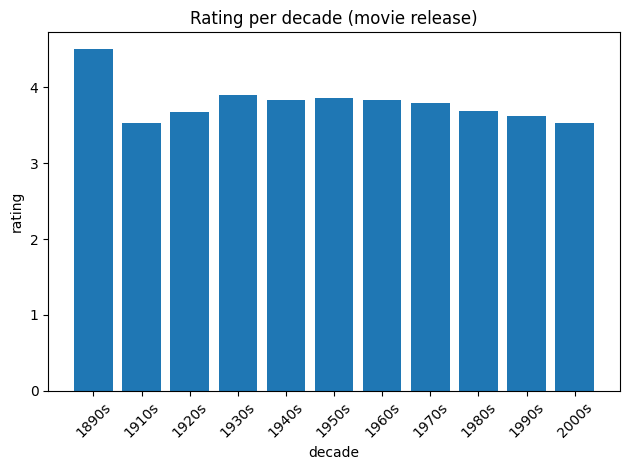

In [33]:
### Comme prèmiere view on peut faire:
    
plot_bar(df_view_decades, col_x="decade", col_y="rating", title="Rating per decade (movie release)")

<Axes: xlabel='rating', ylabel='Count'>

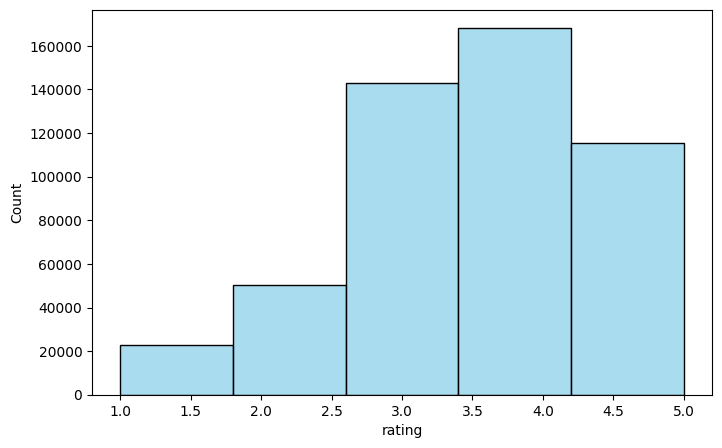

In [29]:
# Define bins to center the integer ratings (1, 2, 3, 4, 5)

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='rating',
    discrete= False,
    bins=5,           # Use the custom bins
    kde=False,           # Remove the misleading continuous curve
    stat='count',        # Show the raw count of ratings in each bin
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

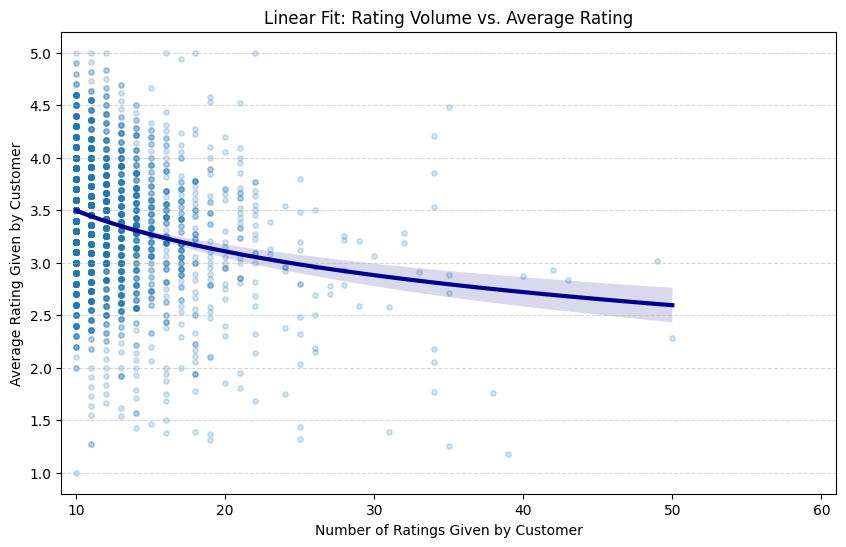

In [31]:

customer_stats = df.groupby('customer_id').agg(
    # 1. Calculate the number of ratings (Rating Volume)
    num_ratings=('rating', 'count'),
    # 2. Calculate the average rating (Rating Tendency)
    avg_rating=('rating', 'mean')
)

min_ratings = 10
max_ratings = 60

# --- Apply the combined boolean mask ---
# This keeps only customers who meet BOTH criteria: (>= 5) AND (<= 60)
customer_stats_doubly_filtered = customer_stats[
    (customer_stats['num_ratings'] >= min_ratings) & 
    (customer_stats['num_ratings'] <= max_ratings)
].copy()
# --- 3. Plot with Linear Regression (No Log) ---

plt.figure(figsize=(10, 6))

# Plot the scatterplot with a straight (linear) regression line
sns.regplot(
    data=customer_stats_doubly_filtered,
    x='num_ratings',
    y='avg_rating',
    logx = True,
    #order=1, # <--- Forces a straight linear line
    scatter_kws={'alpha':0.2, 's':15}, # Use higher transparency for better visibility
    line_kws={'color':'darkblue', 'linewidth': 3}
)







plt.title(f'Linear Fit: Rating Volume vs. Average Rating')
plt.xlabel('Number of Ratings Given by Customer')
plt.ylabel('Average Rating Given by Customer')

plt.xlim(min_ratings - 1, max_ratings + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<Axes: xlabel='num_ratings', ylabel='Count'>

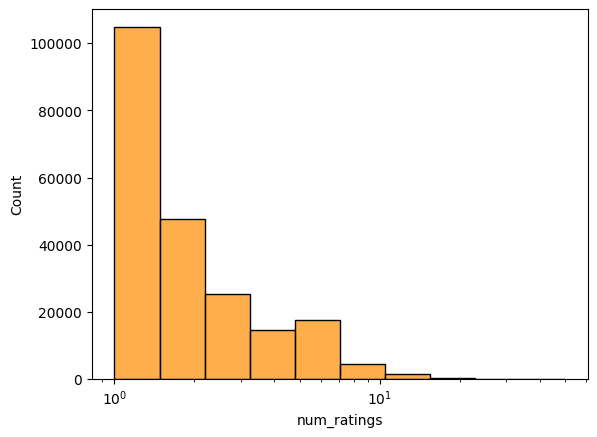

In [ ]:
# Create a filtered DataFrame
customer_stats_filtered_60 = customer_stats[
    customer_stats['num_ratings'] <= custom_cutoff
].copy()


sns.histplot(
    data=customer_stats_filtered_60,
    x='num_ratings',
    bins=10,             # Use many bins to define the shape well
    kde=False, 
    log_scale=True,         # Keep kde=False as you requested
    color='darkorange',
    edgecolor='black',
    alpha=0.7
)

In [ ]:
movie_stats = df.groupby('title').agg(
    rating_count=('rating', 'count'), 
    # This calculates the average rating (R) for the WR formula
    avg_rating=('rating', 'mean') 
).reset_index()


print(movie_stats.head())


C = df['rating'].mean()

# 2. Calculate m (Minimum Votes Threshold - use the 90th percentile as an example)
# First, ensure you have a 'rating_count' column in your aggregated movie data
m = movie_stats['rating_count'].quantile(0.90)

print(C)
print(m)


                                    title  rating_count  avg_rating
0                  'Allo 'Allo!: Series 1             8    4.250000
1                  'Allo 'Allo!: Series 2             2    4.000000
2                     'N Sync: 'N the Mix             1    1.000000
3  'N Sync: Live at Madison Square Garden             3    1.666667
4             'N Sync: Making of the Tour             4    1.000000
3.6063456380738286
87.0


In [ ]:
# The WR calculation is only meaningful for movies that meet the vote threshold (v >= m).
# We'll calculate it for all movies, but recommend filtering later.

# Rename columns for clarity in the calculation:
v = movie_stats['rating_count']
R = movie_stats['avg_rating']

# Calculate WR using the constants C and m:
movie_stats['weighted_rating'] = (
    (v / (v + m)) * R 
) + (
    (m / (v + m)) * C
)

eligible_movies = movie_stats[movie_stats['rating_count'] >= m].copy()

# 2. Sort by the Weighted Rating (WR)
top_movies = eligible_movies.sort_values(by='weighted_rating', ascending=False).head(10)

print(top_movies)

                                                   title  rating_count  \
11725  The Lord of the Rings: The Fellowship of the R...           381   
12297          The Shawshank Redemption: Special Edition           739   
6434   Lord of the Rings: The Two Towers: Extended Ed...           394   
6430   Lord of the Rings: The Return of the King: Ext...           361   
6428           Lord of the Rings: The Return of the King           667   
8498                             Raiders of the Lost Ark           632   
9940       Star Wars: Episode V: The Empire Strikes Back           463   
9127                                    Schindler's List           451   
9939                   Star Wars: Episode IV: A New Hope           444   
3919                           Finding Nemo (Widescreen)           707   

       avg_rating  weighted_rating  
11725    4.787402         4.567846  
12297    4.611637         4.505753  
6434     4.703046         4.504682  
6430     4.698061         4.486054  


/tmp/ipykernel_41425/2573461306.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


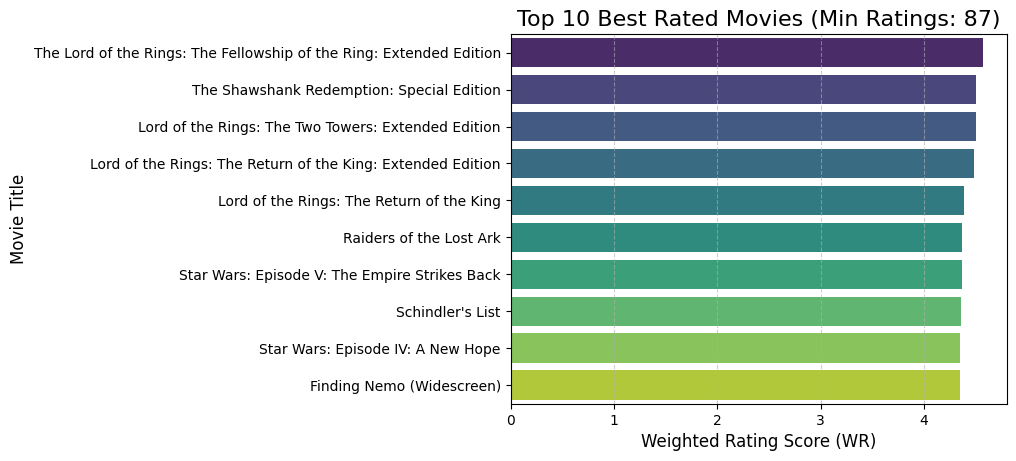

In [ ]:
sns.barplot(
    # The X-axis is the calculated Weighted Rating
    x='weighted_rating',
    # The Y-axis is the Movie Title
    y='title',
    data=top_movies,
    palette='viridis' # A nice color palette for ranking
)



plt.title(f'Top 10 Best Rated Movies (Min Ratings: {m:.0f})', fontsize=16)
plt.xlabel('Weighted Rating Score (WR)', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()